In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
data = pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\\SALES PREDICTION PROJECT\\preprocessed_data.csv')

# Feature selection based on your heatmap analysis
features = ['Transaction Type', 'Salesman', 'Stock No.', 'Class Name', 'Style Code', 'MRP', 'SGST Value', 'CGST Value']  # Add or remove features based on your analysis
target = 'Value'

X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')



Mean Squared Error: 9758.198269245211
R^2 Score: 0.9926592090054406


In [6]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

n = len(y_test)
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R² Score: {adjusted_r2}')

from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validated R² Scores: {cross_val_scores}')
print(f'Mean Cross-Validated R² Score: {cross_val_scores.mean()}')


Mean Absolute Error: 13.516064107730099
Root Mean Squared Error: 98.78359311770964
Adjusted R² Score: 0.9926514686168869
Cross-Validated R² Scores: [0.97035509 0.82468493 0.97488813 0.90475194 0.96123338]
Mean Cross-Validated R² Score: 0.9271826948617073


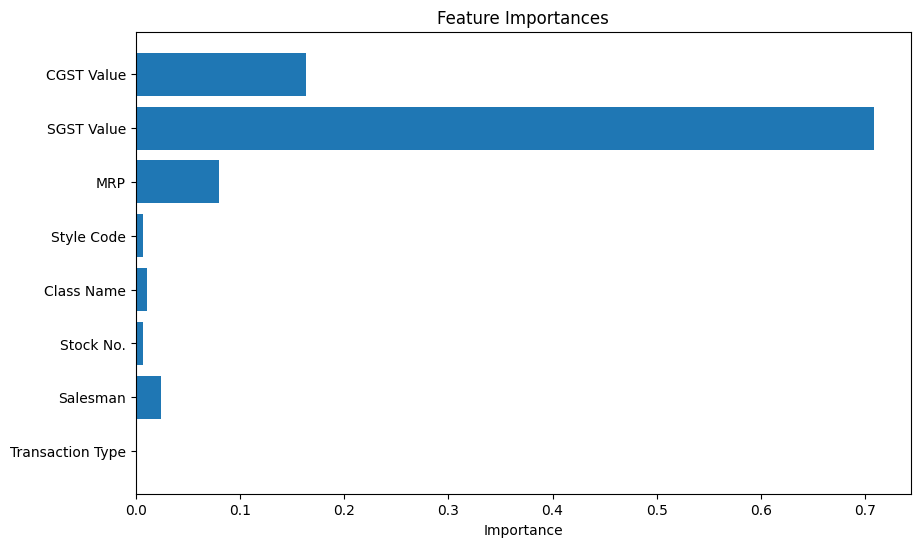

In [7]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


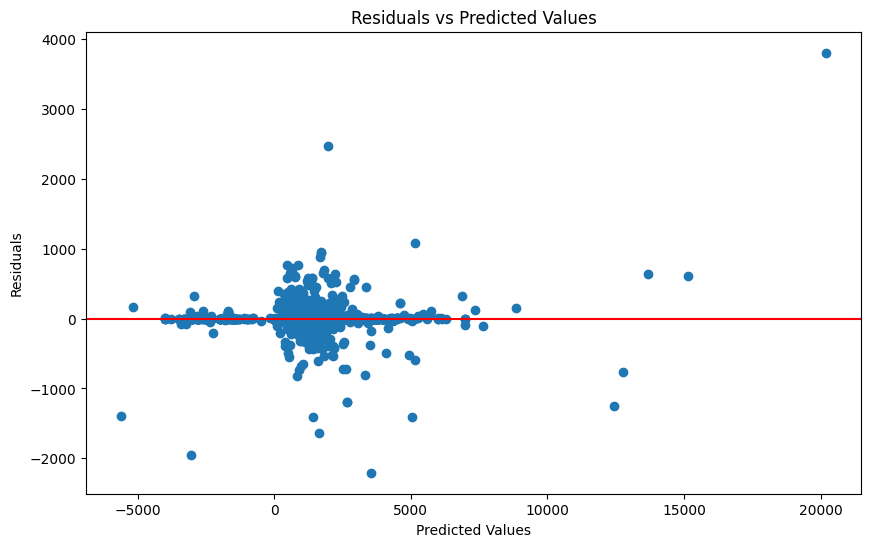

In [8]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


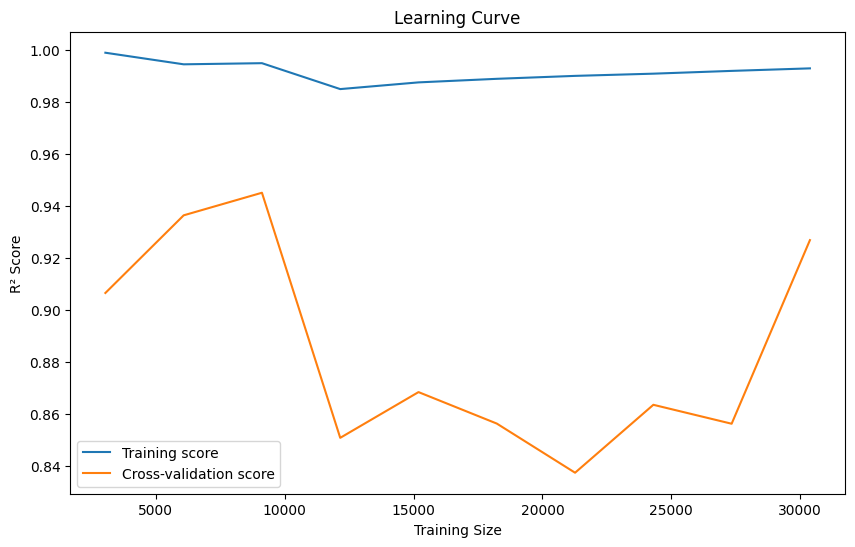

In [10]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


In [11]:
# Save the model
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']